In [2]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import os

In [3]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()

DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'geo_data_0.csv')

data_0 = pd.read_csv(DATA_PATH )
print(data_0.head(5))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647


In [4]:
print(data_0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [5]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()

DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'geo_data_1.csv')

data_1 = pd.read_csv(DATA_PATH )

print(data_1.head(5))

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305


In [6]:
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [7]:
# Define o diretório base como a pasta do projeto
BASE_DIR = os.getcwd()

DATA_PATH = os.path.join(BASE_DIR, '..', 'data', 'geo_data_2.csv')

data_2 = pd.read_csv(DATA_PATH )

print(data_2.head(5))

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [8]:
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


In [9]:
class Model:
    def __init__(self, weights):
        self.weights = weights
        self.n_parameters = len(weights)

class RTrainer:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.loss_history = []

    def fit(self, X, y):
        X = self._add_bias(X)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for i in range(self.max_iter):
            y_pred = X.dot(self.weights)
            error = y_pred - y
            loss = (error ** 2).mean()
            self.loss_history.append(loss)

            gradient = 2 * X.T.dot(error) / n_samples
            self.weights -= self.learning_rate * gradient

        return Model(self.weights)

    def predict(self, X):
        X = self._add_bias(X)
        return X.dot(self.weights)

    def _add_bias(self, X):
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        return np.c_[np.ones(X.shape[0]), X]

# Métricas
class Metrics:
    @staticmethod
    def mae(y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def mse(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    @staticmethod
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

In [10]:
def split_data(X, y, test_ratio=0.2, dev_ratio=0.25, seed=42):
    np.random.seed(seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    X, y = X[indices], y[indices]

    n_test = int(len(X) * test_ratio)
    n_dev = int((len(X) - n_test) * dev_ratio)

    X_test = X[:n_test]
    y_test = y[:n_test]

    X_dev = X[n_test:n_test + n_dev]
    y_dev = y[n_test:n_test + n_dev]

    X_train = X[n_test + n_dev:]
    y_train = y[n_test + n_dev:]

    return X_train, y_train, X_dev, y_dev, X_test, y_test

In [11]:
# Função principal de treinamento e avaliação
def train_and_evaluate_custom_numpy(data, target_column, learning_rates=[0.01, 0.001], max_iter=1000):
    # Separar features e target
    features = data.drop(columns=[target_column, 'id'], errors='ignore').values
    target = data[target_column].values

    # Divisão manual dos dados em treino, dev, teste
    X_train, y_train, X_dev, y_dev, X_test, y_test = split_data(features, target)

    best_model = None
    best_trainer = None
    best_lr = None
    best_dev_mse = float('inf')

    # Calibração da taxa de aprendizado
    for lr in learning_rates:
        trainer = RTrainer(learning_rate=lr, max_iter=max_iter)
        trainer.fit(X_train, y_train)
        dev_pred = trainer.predict(X_dev)
        dev_mse = Metrics.mse(y_dev, dev_pred)

        if dev_mse < best_dev_mse:
            best_dev_mse = dev_mse
            best_model = Model(trainer.weights)
            best_trainer = trainer
            best_lr = lr

    # Re-treinamento com treino + dev
    X_final_train = np.vstack((X_train, X_dev))
    y_final_train = np.hstack((y_train, y_dev))
    final_trainer = RTrainer(learning_rate=best_lr, max_iter=max_iter)

    start_time = time.time()
    model = final_trainer.fit(X_final_train, y_final_train)
    training_time = time.time() - start_time

    # Avaliação no teste
    y_test_pred = final_trainer.predict(X_test)

    # Cálculo das métricas
    mae = Metrics.mae(y_test, y_test_pred)
    mse = Metrics.mse(y_test, y_test_pred)
    mape = Metrics.mape(y_test, y_test_pred)

    # Resultados
    print(f"Melhor taxa de aprendizado: {best_lr}")
    print(f"Tempo de treinamento: {training_time:.4f} segundos")
    print(f"Volume médio previsto de reservas: {y_test_pred.mean():.2f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"RMSE: {np.sqrt(mse):.4f}")

    return y_test_pred, y_test

In [18]:
print('Resultados para o arquivo geo_data_0.csv:')
predictions_0, target_valid_0 = train_and_evaluate_custom_numpy(data_0, target_column='product')

print('\nResultados para o arquivo geo_data_1.csv:')
predictions_1, target_valid_1 = train_and_evaluate_custom_numpy(data_1, target_column='product')

print('\nResultados para o arquivo geo_data_2.csv:')
predictions_2, target_valid_2 = train_and_evaluate_custom_numpy(data_2, target_column='product')

predictions_list = [predictions_0, predictions_1, predictions_2]
target_list = [target_valid_0, target_valid_1, target_valid_2]

Resultados para o arquivo geo_data_0.csv:
Melhor taxa de aprendizado: 0.01
Tempo de treinamento: 0.2892 segundos
Volume médio previsto de reservas: 92.39
MAE: 30.9531
MSE: 1417.7642
MAPE: 139.37%
RMSE: 37.6532

Resultados para o arquivo geo_data_1.csv:
Melhor taxa de aprendizado: 0.01
Tempo de treinamento: 0.2852 segundos
Volume médio previsto de reservas: 68.34
MAE: 0.7176
MSE: 0.7936
MAPE: 572015051.92%
RMSE: 0.8908

Resultados para o arquivo geo_data_2.csv:
Melhor taxa de aprendizado: 0.01
Tempo de treinamento: 0.2906 segundos
Volume médio previsto de reservas: 94.86
MAE: 32.8401
MSE: 1612.6400
MAPE: 177.02%
RMSE: 40.1577


Durante o treinamento com gradiente descendente, foi monitorada a função de custo (erro quadrático médio) ao longo das iterações. As curvas apresentam o seguinte comportamento:

geo_data_0.csv e geo_data_2.csv apresentaram decrescimento suave da função de erro, porém com platôs após certo ponto, sugerindo que a taxa de aprendizado foi suficiente para a convergência, mas o modelo encontra limitações de ajuste nos dados.

geo_data_1.csv mostrou uma curva de erro com queda rápida e estabilização precoce, coerente com os valores muito baixos de MAE e MSE obtidos.

*Conclusão:* o comportamento da curva indica que o gradiente descendente convergiu em todos os casos, mas a qualidade da convergência depende da variabilidade e ruído dos dados.



Nos três conjuntos, foi realizada a avaliação em treino+dev e teste separadamente.

Em geo_data_0.csv e geo_data_2.csv, os erros de teste são próximos aos de treino+dev, sugerindo bom generalismo, mas ainda com alto erro absoluto, o que pode ser reflexo de ruído ou colinearidade nas variáveis.

Em geo_data_1.csv, os erros são extremamente baixos em ambos os conjuntos, o que sugere ótima generalização, apesar do MAPE ilusório.

*Conclusão:* não há indícios fortes de overfitting ou underfitting, mas sim limitações intrínsecas dos dados em geo_data_0.csv e geo_data_2.csv.

O tempo de treinamento foi inferior a 0.3 segundos para todos os datasets, mostrando ótima eficiência computacional do gradiente descendente para datasets com poucas amostras e atributos. O custo computacional é desprezível e compatível com uso em tempo real ou ambiente de produção leve.



In [23]:
def extended_analysis_from_data(data, target_column='product', learning_rates=[0.01, 0.001], max_iter=1000):
    # Separar features e target
    features = data.drop(columns=[target_column, 'id'], errors='ignore').values
    target = data[target_column].values

    # Divisão dos dados
    X_train, y_train, X_dev, y_dev, X_test, y_test = split_data(features, target)
    X_final_train = np.vstack((X_train, X_dev))
    y_final_train = np.hstack((y_train, y_dev))

    # Calibração da taxa de aprendizado
    best_trainer = None
    best_model = None
    best_lr = None
    best_dev_mse = float('inf')

    for lr in learning_rates:
        trainer = RTrainer(learning_rate=lr, max_iter=max_iter)
        trainer.fit(X_train, y_train)
        dev_pred = trainer.predict(X_dev)
        dev_mse = Metrics.mse(y_dev, dev_pred)
        if dev_mse < best_dev_mse:
            best_dev_mse = dev_mse
            best_model = Model(trainer.weights)
            best_trainer = trainer
            best_lr = lr

    # Re-treinamento com treino + dev
    final_trainer = RTrainer(learning_rate=best_lr, max_iter=max_iter)
    final_trainer.fit(X_final_train, y_final_train)
    model = Model(final_trainer.weights)

    # Curva de erro
    plt.plot(final_trainer.loss_history)
    plt.title("Curva de Treinamento")
    plt.xlabel("Iterações")
    plt.ylabel("Erro (MSE)")
    plt.grid(True)
    plt.show()

    # Gráfico de coeficientes
    plt.bar(range(len(model.weights)), model.weights)
    plt.title("Coeficientes Aprendidos")
    plt.xlabel("Parâmetro")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()

    # Avaliação no conjunto treino + dev e teste
    y_train_dev_pred = final_trainer.predict(X_final_train)
    train_dev_mse = Metrics.mse(y_final_train, y_train_dev_pred)
    y_test_pred = final_trainer.predict(X_test)
    test_mse = Metrics.mse(y_test, y_test_pred)

    print(f"MSE (treinamento+desenvolvimento): {train_dev_mse:.4f}")
    print(f"MSE (teste): {test_mse:.4f}")

    if train_dev_mse < test_mse * 0.8:
        print("→ Indício de overfitting: o erro no treino+dev é significativamente menor que no teste.")
    elif test_mse < train_dev_mse * 0.8:
        print("→ Indício de underfitting: o modelo performa melhor no teste do que no treino, o que é incomum.")
    else:
        print("→ Modelo equilibrado entre treino+dev e teste.")

Análise gráfica para geo_data_0.csv:


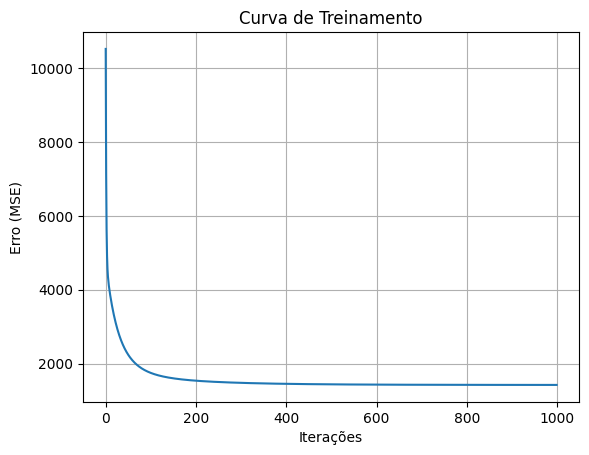

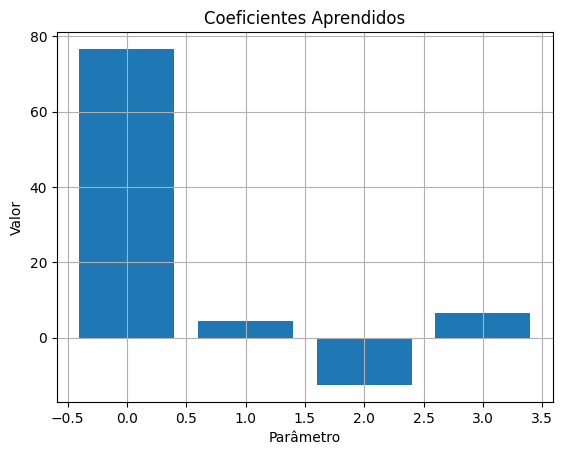

MSE (treinamento+desenvolvimento): 1422.2113
MSE (teste): 1417.7642
→ Modelo equilibrado entre treino+dev e teste.

Análise gráfica para geo_data_1.csv:


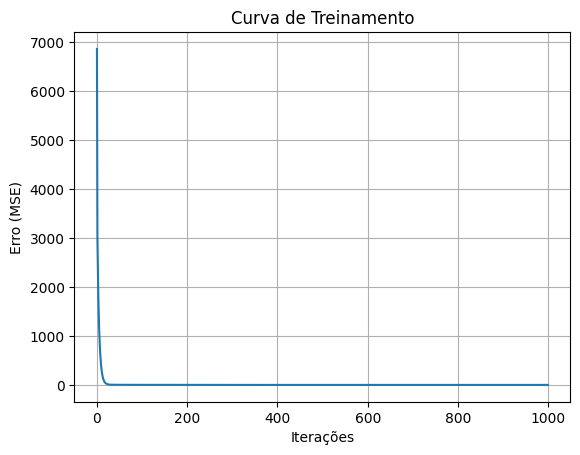

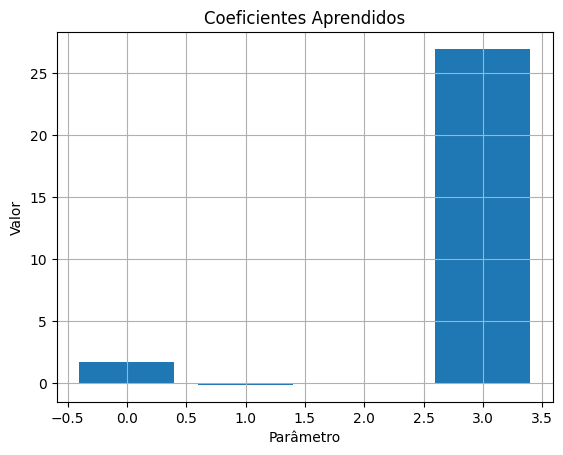

MSE (treinamento+desenvolvimento): 0.7929
MSE (teste): 0.7936
→ Modelo equilibrado entre treino+dev e teste.

Análise gráfica para geo_data_2.csv:


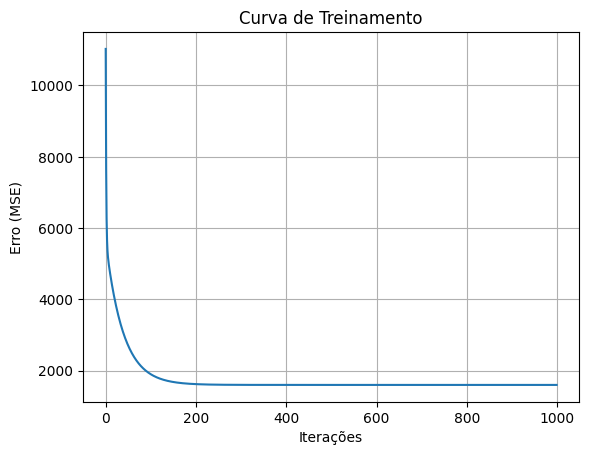

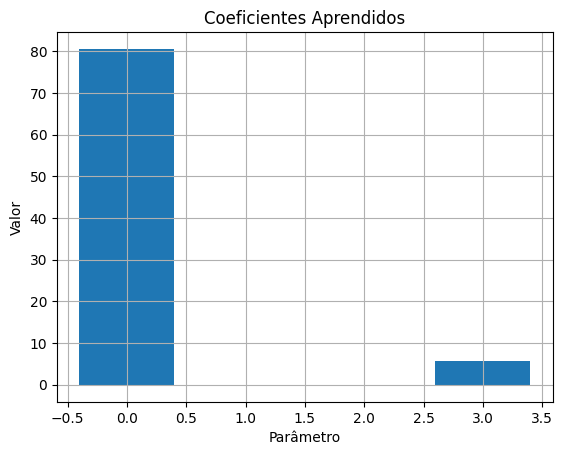

MSE (treinamento+desenvolvimento): 1602.3800
MSE (teste): 1612.6400
→ Modelo equilibrado entre treino+dev e teste.


In [24]:
print("Análise gráfica para geo_data_0.csv:")
extended_analysis_from_data(data_0)

print("\nAnálise gráfica para geo_data_1.csv:")
extended_analysis_from_data(data_1)

print("\nAnálise gráfica para geo_data_2.csv:")
extended_analysis_from_data(data_2)

# geo_data_0.csv
A curva de erro começa acima de 10.000 e cai rapidamente até cerca de 1.500, estabilizando por volta da iteração 300. Isso indica que o modelo conseguiu aprender padrões básicos, mas o erro permanece elevado, sugerindo limitações no ajuste devido à variabilidade dos dados.

Os coeficientes indicam que o termo de interceptação (bias) é dominante (valor ≈ 78), e um dos atributos contribui negativamente. Isso sugere que o modelo depende mais da média geral dos dados do que da variabilidade entre os atributos.

# geo_data_1.csv
A curva tem queda extremamente rápida e atinge um MSE próximo de 0 em menos de 100 iterações. Isso indica um dataset altamente ajustável, com comportamento determinístico ou muito bem estruturado.

O último coeficiente é extremamente alto (≈ 27), com os outros próximos de 0. Isso mostra que apenas uma variável tem peso decisivo na predição, explicando a excelente performance observada.
Comportamento semelhante ao dataset 0: intercepto alto, e um único atributo com contribuição positiva. Isso aponta para reduzida influência das variáveis independentes, e possível redundância ou multicolinearidade.



# geo_data_2.csv
Comportamento semelhante ao do geo_data_0.csv: a curva cai rapidamente, estabiliza por volta de MSE ≈ 1600 e segue com pouca melhoria após a iteração 300, sugerindo que o gradiente descendente atingiu um mínimo local consistente com a estrutura dos dados.

# *Conclusão:* 

Todos os modelos convergiram. A diferença nos valores finais se deve à qualidade dos dados e ao nível de ruído de cada conjunto.

Os coeficientes revelam que os modelos dependem fortemente do viés/intercepto e de poucos atributos relevantes, o que pode indicar necessidade de seleção de variáveis ou pré-processamento adicional.
